# Assignment 1

First we need to import a few modules, execute the cell below:

In [34]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [35]:
def f(x):
    return numpy.cos(x)
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    # YOUR CODE HERE

You can use the following cell to check that your code works for scalar arguments:

In [36]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [37]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [38]:
def df_analytic(x):
    return -numpy.sin(x)
    '''
    The analytic derivative
    '''
    # YOUR CODE HERE

In [39]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [40]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [41]:
def backward_difference(f, x, dx):
    return (f(x)-f(x-dx))/dx
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    # YOUR CODE HERE

In [42]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


<function matplotlib.pyplot.show>

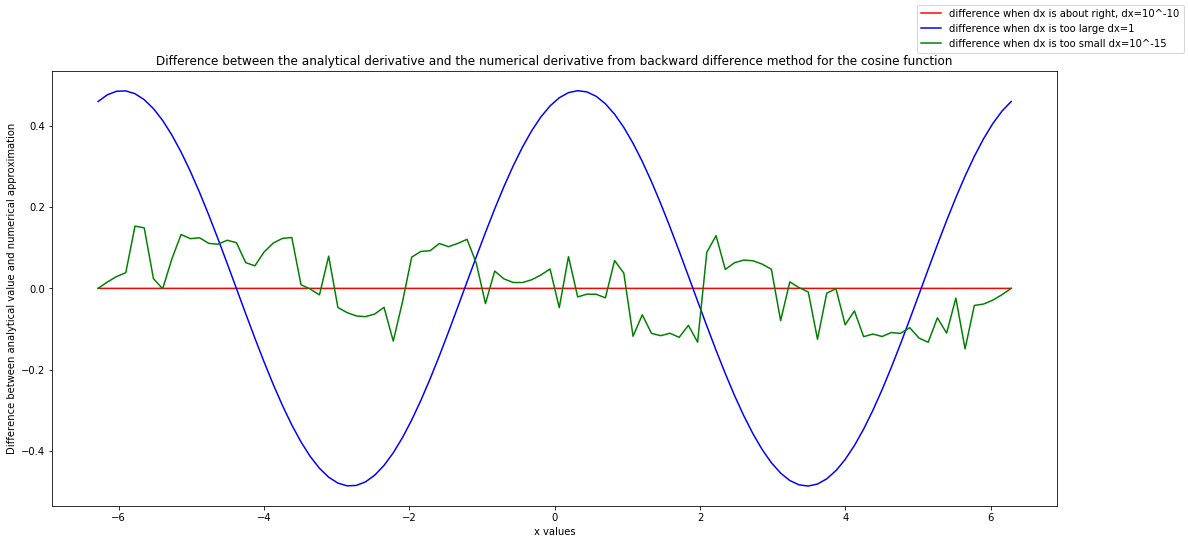

In [46]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-10)
df_dx_2 = backward_difference(f, xs, dx=1)
df_dx_3 = backward_difference(f, xs, dx=1e-15)

df_dx_analytical = df_analytic(xs)
figure1=plt.figure(figsize=(18, 8))
plt.title("Difference between the analytical derivative and the numerical derivative from backward difference method for the cosine function")
plt.plot(xs, df_dx_1 - df_dx_analytical, color="red", label="difference when dx is about right, dx=10^-10")
plt.plot(xs, df_dx_2 - df_dx_analytical,color="blue", label="difference when dx is too large dx=1 ")
plt.plot(xs, df_dx_3 - df_dx_analytical,color="green", label="difference when dx is too small dx=10^-15")
figure1.legend(loc="upper right")
plt.xlabel("x values")
plt.ylabel("Difference between analytical value and numerical approximation")
plt.show

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


Because the computer stores the numbers that it uses in floating point form, using a constant multiplier and an exponent. This floating point form has a limited precision (limited number of decimal places essentially,although a computer works in binary). This means that as the computer does its calculations, it rounds any numbers that have too many decimal places, and if it ends up calculating a number with some of the decimal places not filled, the computer fills these in a deterministic way but not in a fashion such that it will yield the correct value for all calculations. If delta x is too small, f(x)-f(x-dx) will be small, so when this gets rounded and stored by the computer, the value of f(x)-f(x-dx) will change by a greater percentage of its actual value when rounded than it would if f(x)-f(x-dx) was larger. Some information is lost, and the value of the backward difference is changed by a large percentage of its actual value, so the numerical method loses its accuracy. Also, when delta x is too large, the method loses accuracy because it's an approximation of the derivative and the derivative involves taking the limit as delta x tends to 0, so it ceases to be a good approximation when dx is large because it relies on the assumption that dx is small and close to 0.